# Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

# Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

# Objective 

Create a descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

# 1) Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import copy

In [2]:
df = pd.read_csv(r'C:\Users\SRI RAM\Desktop\airsoft\air.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# 1.1)The data type of all columns in the “customers” table.

In [4]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

Product, Gender and Marital Status are object(string)
Age, Education, Usage, Fitness, Income and Miles are in int64(integer)

# 1.2) The number of rows and columns given in the dataset

In [5]:
df.shape

(180, 9)

Total count of all columns is 9 and rows is 180

# 1.3) The missing values and find the number of missing values in each column

In [6]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


There are no nulls hence there are no missing values

# 2) Detect Outliers

# 2.1) Find the outliers for every continuous variable in the dataset

we neefd to plot box plot for each cloumn to find number of outliers

In [8]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


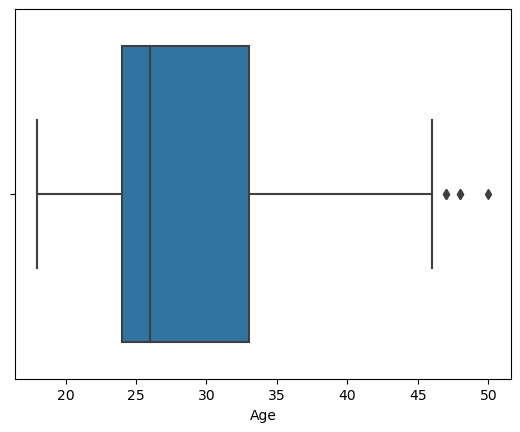

In [9]:
sns.boxplot(data=df,x='Age')
plt.show()

23 to 34 is the most common customer age group that has purchased the product
Mean is at age of 26, so avergae age of customers can be taken as 26
Above 45 years old customers are very few compared to the young age group given in the dataset

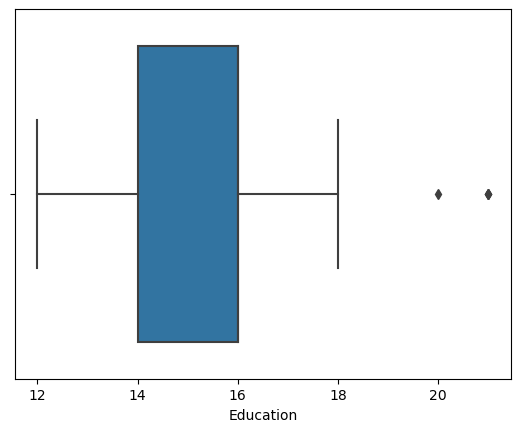

In [10]:
sns.boxplot(data=df,x='Education')
plt.show()

Highest number of customers are inbetween 14 and 16 as their Education
Customers who have education above 18 are outliers
20 is the least education among the customers

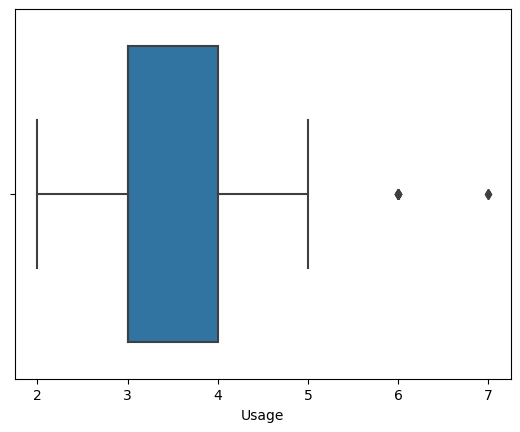

In [11]:
sns.boxplot(data=df,x='Usage')
plt.show()

3 to 4 days is the most preferred usage days for customers
6 and 7 days per week is roughly the usage days for few customers (Outliers)

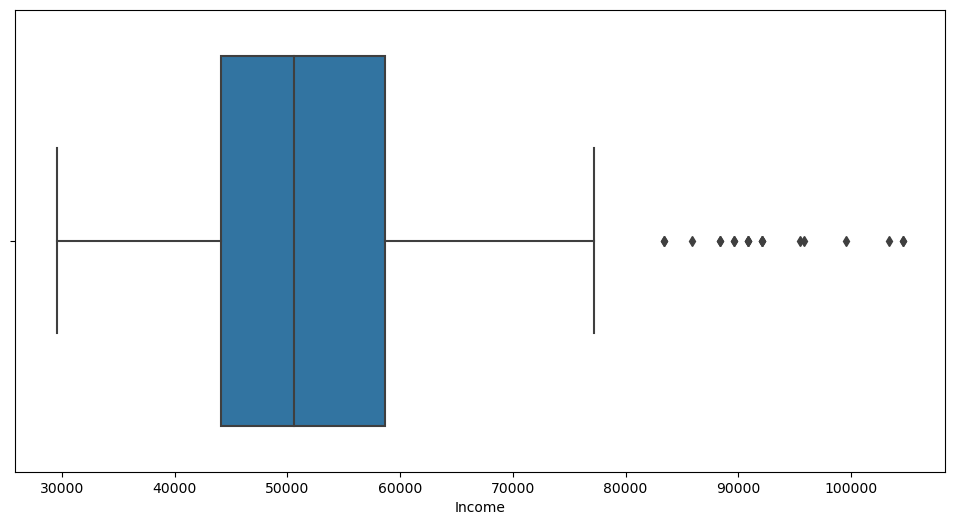

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='Income')
plt.show()

Few customers have income above 80K per annum(Outliers)
Most customers earn from 45K to around 58K per annum
51K is the mean of salary of all customers

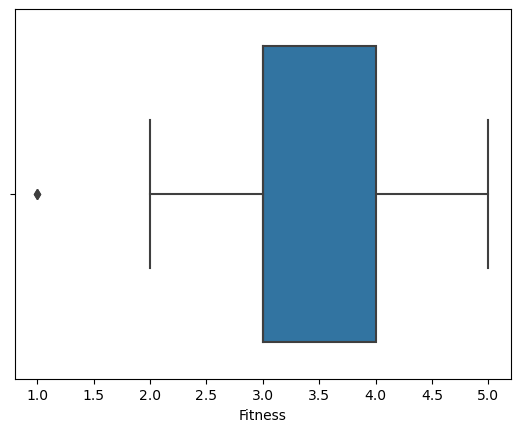

In [13]:
sns.boxplot(data=df,x='Fitness')
plt.show()

Couple of customers have rated their fitness rating as 1 - Poor Shape
Most customers have rated fitness rating as 3.0 to 4.0

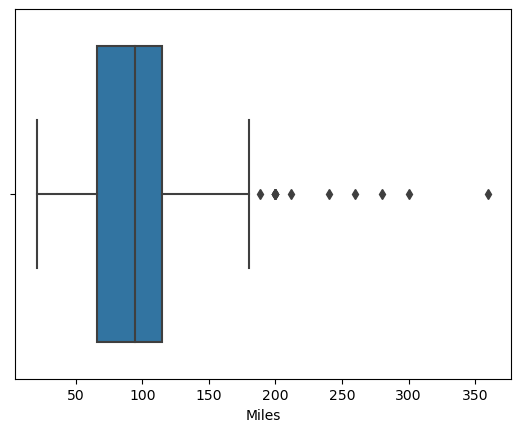

In [14]:
sns.boxplot(data=df,x='Miles')
plt.show()

Most customers run between 60 to 120 miles per week
customers who run above 170 miles are outliers

# 2.2) Remove/clip the data between the 5 percentile and 95 percentile

In [15]:
lower_percentile = 0.05
higher_percentile = 0.95

In [16]:
low, high = df["Age"].quantile([lower_percentile, higher_percentile])

In [17]:
low

20.0

In [18]:
high

43.04999999999998

In [19]:
df["Age"] = np.clip(df["Age"], a_min = low, a_max = high)

In [20]:
df.Age.value_counts()

Age
25.00    25
23.00    18
24.00    12
26.00    12
20.00    10
28.00     9
43.05     9
35.00     8
33.00     8
22.00     7
27.00     7
38.00     7
30.00     7
21.00     7
29.00     6
34.00     6
31.00     6
40.00     5
32.00     4
37.00     2
39.00     1
41.00     1
43.00     1
36.00     1
42.00     1
Name: count, dtype: int64

data below 20 years and above 43 years are clipped out using np.clip()

In [21]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [22]:
low1, high1 = df["Education"].quantile([lower_percentile, higher_percentile])

In [23]:
low1

14.0

In [24]:
high1

18.0

In [25]:
df["Education"] = np.clip(df["Education"], a_min = low1, a_max = high1)

In [26]:
df.Education.value_counts()

Education
16    85
14    63
18    27
15     5
Name: count, dtype: int64

 data below 14 and above 18 are clipped out using np.clip() for eudcation

In [27]:
low2, high2 = df["Usage"].quantile([lower_percentile, higher_percentile])

In [28]:
low2

2.0

In [29]:
high2

5.049999999999983

In [30]:
df["Usage"] = np.clip(df["Usage"], a_min = low2, a_max = high2)
df.Usage.value_counts()

Usage
3.00    69
4.00    52
2.00    33
5.00    17
5.05     9
Name: count, dtype: int64

Customers who are below 2 days and above 5 days are clipped out using np.clip()

In [31]:
low3, high3 = df["Income"].quantile([lower_percentile, higher_percentile])

In [32]:
low3, high3

(34053.15, 90948.24999999999)

In [33]:
df["Income"] = np.clip(df["Income"], a_min = low3, a_max = high3)
df.Income.value_counts()


Income
45480.00    14
52302.00     9
34053.15     9
90948.25     9
54576.00     8
46617.00     8
53439.00     8
51165.00     7
50028.00     7
40932.00     6
48891.00     5
34110.00     5
35247.00     5
38658.00     5
43206.00     5
57987.00     4
36384.00     4
44343.00     4
60261.00     3
90886.00     3
59124.00     3
64809.00     3
67083.00     2
48556.00     2
37521.00     2
39795.00     2
88396.00     2
83416.00     2
64741.00     2
49801.00     2
56850.00     2
61006.00     2
89641.00     2
61398.00     2
47754.00     2
42069.00     2
54781.00     1
74701.00     1
85906.00     1
52290.00     1
77191.00     1
55713.00     1
68220.00     1
69721.00     1
75946.00     1
58516.00     1
70966.00     1
62251.00     1
65220.00     1
62535.00     1
57271.00     1
48658.00     1
53536.00     1
52291.00     1
Name: count, dtype: int64

Customers whose salary is below 34053 and above 90948 are clipped out using np.clip()

In [34]:
low4, high4 = df["Fitness"].quantile([lower_percentile, higher_percentile])
low4, high4

(2.0, 5.0)

In [35]:
df["Fitness"] = np.clip(df["Fitness"], a_min = low4, a_max = high4)
df.Fitness.value_counts()

Fitness
3    97
5    31
2    28
4    24
Name: count, dtype: int64

Customers with rating less than 2 and above 5 are clipped out using np.clip()

In [36]:
low5, high5 = df["Miles"].quantile([lower_percentile, higher_percentile])
low5, high5

(47.0, 200.0)

In [37]:
df["Miles"] = np.clip(df["Miles"], a_min = low5, a_max = high5)
df.Miles.value_counts()

Miles
85     27
47     17
95     12
200    12
66     10
75     10
106     9
94      8
113     8
53      7
100     7
180     6
56      6
64      6
160     5
127     5
150     4
74      3
170     3
120     3
103     3
132     2
141     2
169     1
140     1
188     1
80      1
112     1
Name: count, dtype: int64

Data of customers who ran below 47 miles and above 200 are removed using np.clip()

# 3)Check if features like marital status, Gender, and age have any effect on the product purchased

# 3.1)Find if there is any relationship between the categorical variables and the output variable in the data.

In [38]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47


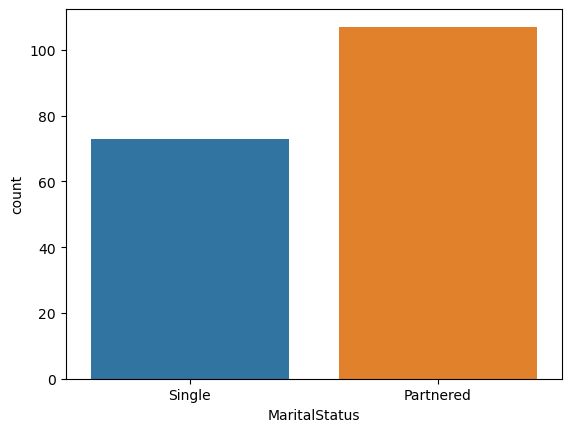

In [39]:
sns.countplot(data=df,x='MaritalStatus')
plt.show()

Couples/Married/Partnered people tend to purchase more pruducts

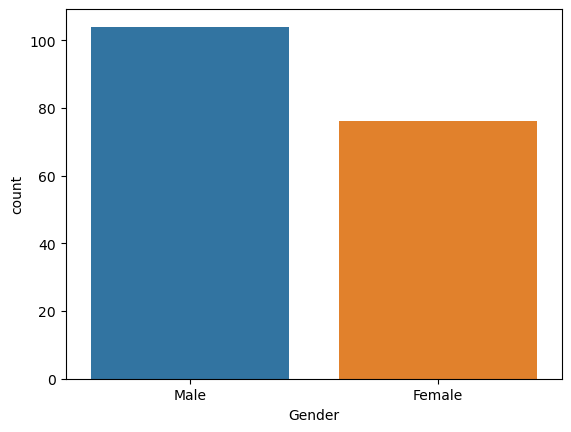

In [40]:
sns.countplot(data=df,x='Gender')
plt.show()

Males tend to purchase more than Females

# 3.2) Find if there is any relationship between the continuous variables and the output variable in the data.

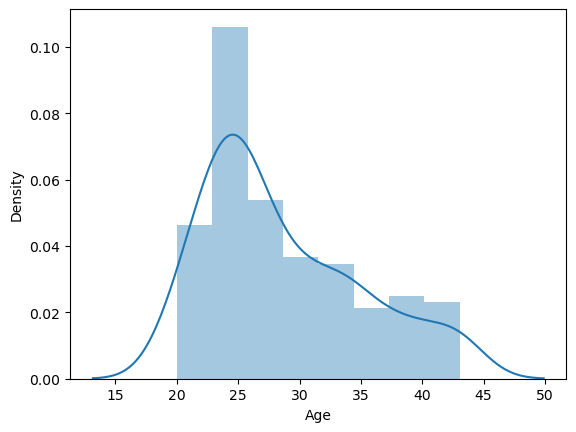

In [41]:
sns.distplot(df.Age)
plt.show()

In [42]:
from numpy import mean

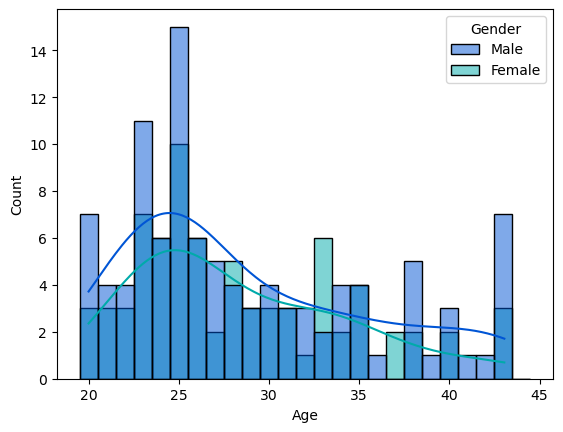

In [74]:
sns.histplot(x='Age', data=df, discrete='false', hue="Gender", palette='winter', kde= True)
plt.show()

In [44]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47


In [45]:
k=df.groupby('Product')['Income'].mean().sort_values(ascending= False).reset_index()

In [46]:
k.head()

,Product,Income
0,KP781,73908.28125
1,KP481,49046.60750
2,KP281,46584.31125


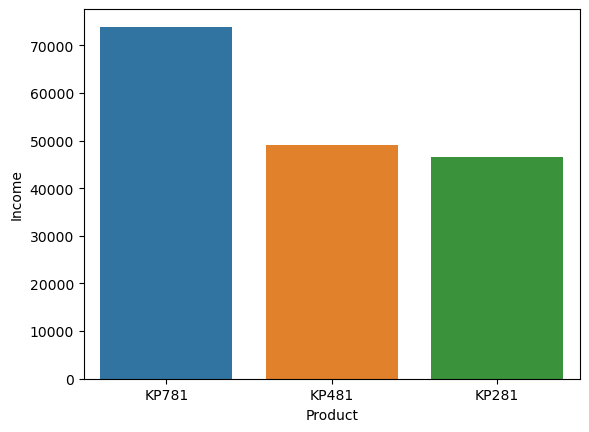

In [47]:
sns.barplot(x="Product", y="Income", data=k)
plt.show()

Customers around age of 25 tend to purchase more than people of other ages

<Axes: xlabel='Miles', ylabel='Income'>

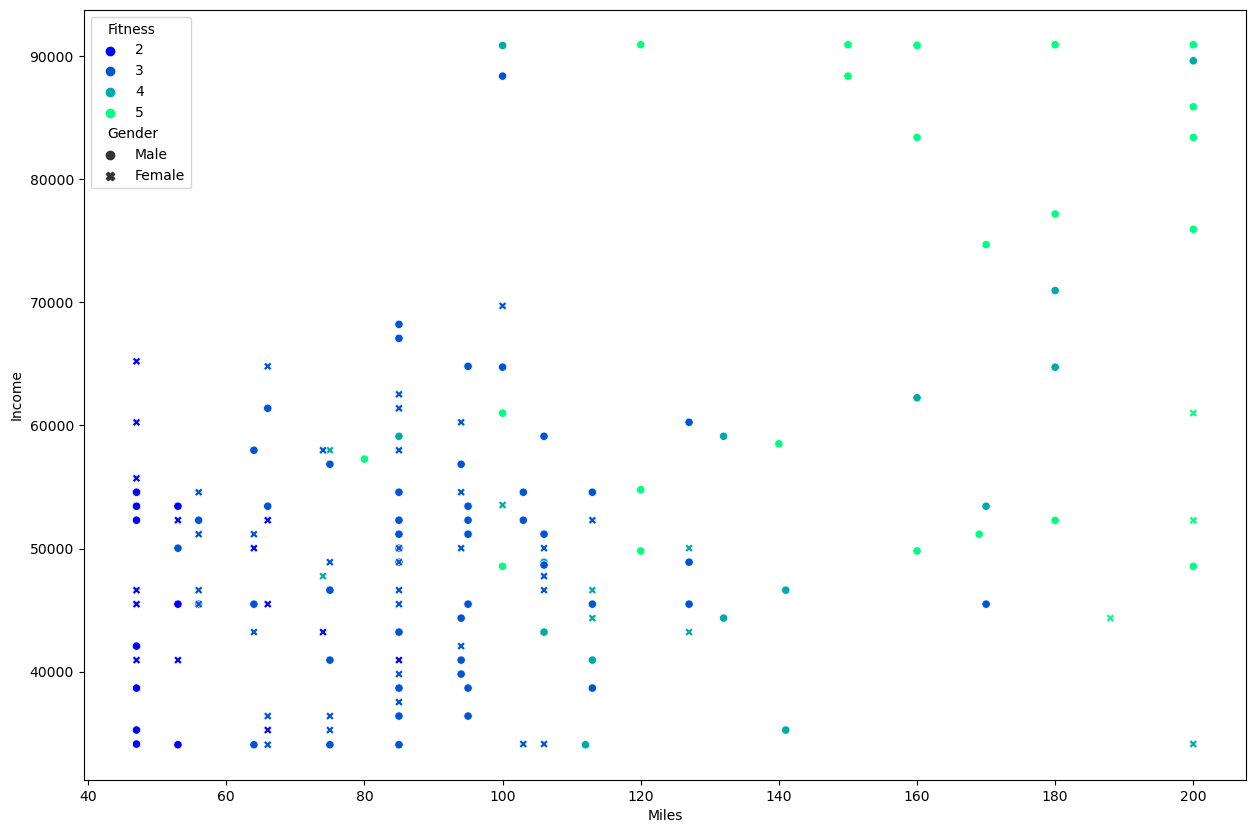

In [48]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Miles',y='Income',data=df,hue='Fitness',style='Gender',palette='winter')

Above scattered Plot shows the overall picture over customer's income, how much they exercise (run/walk miles) given their gender and their fitness level.

Most of the customer's fitness level is around 3 to 4 . and it says people who run more miles are having good fitness level.

Though there is a trend with income and miles. But there are very few customers who earn a lot and run more miles

# Representing the Probability

# 4.1)Find the marginal probability (what percent of customers have purchased KP281, KP481, or KP781)

In [49]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47


In [50]:
pd.crosstab(df.Product,df.Gender, margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


# 4.2)Find the probability that the customer buys a product based on each column.

In [51]:
pd.crosstab(df.Gender,df.Product,normalize='index', margins=True)

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


Probability of customer buying KP281 is 44.444%, KP481 is 33.3333%, KP781 is 22.222% 

# 4.3)Find the conditional probability that an event occurs given that another event has occurred. (Example: given that a customer is female, what is the probability she’ll purchase a KP481)

In [52]:
pd.crosstab(df.Gender,df.Product,normalize='index', margins=True)

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


Probability of a female customer buying KP481 is 38.1579%

# 5.Check the correlation among different factors

 Pairplot

In [53]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47


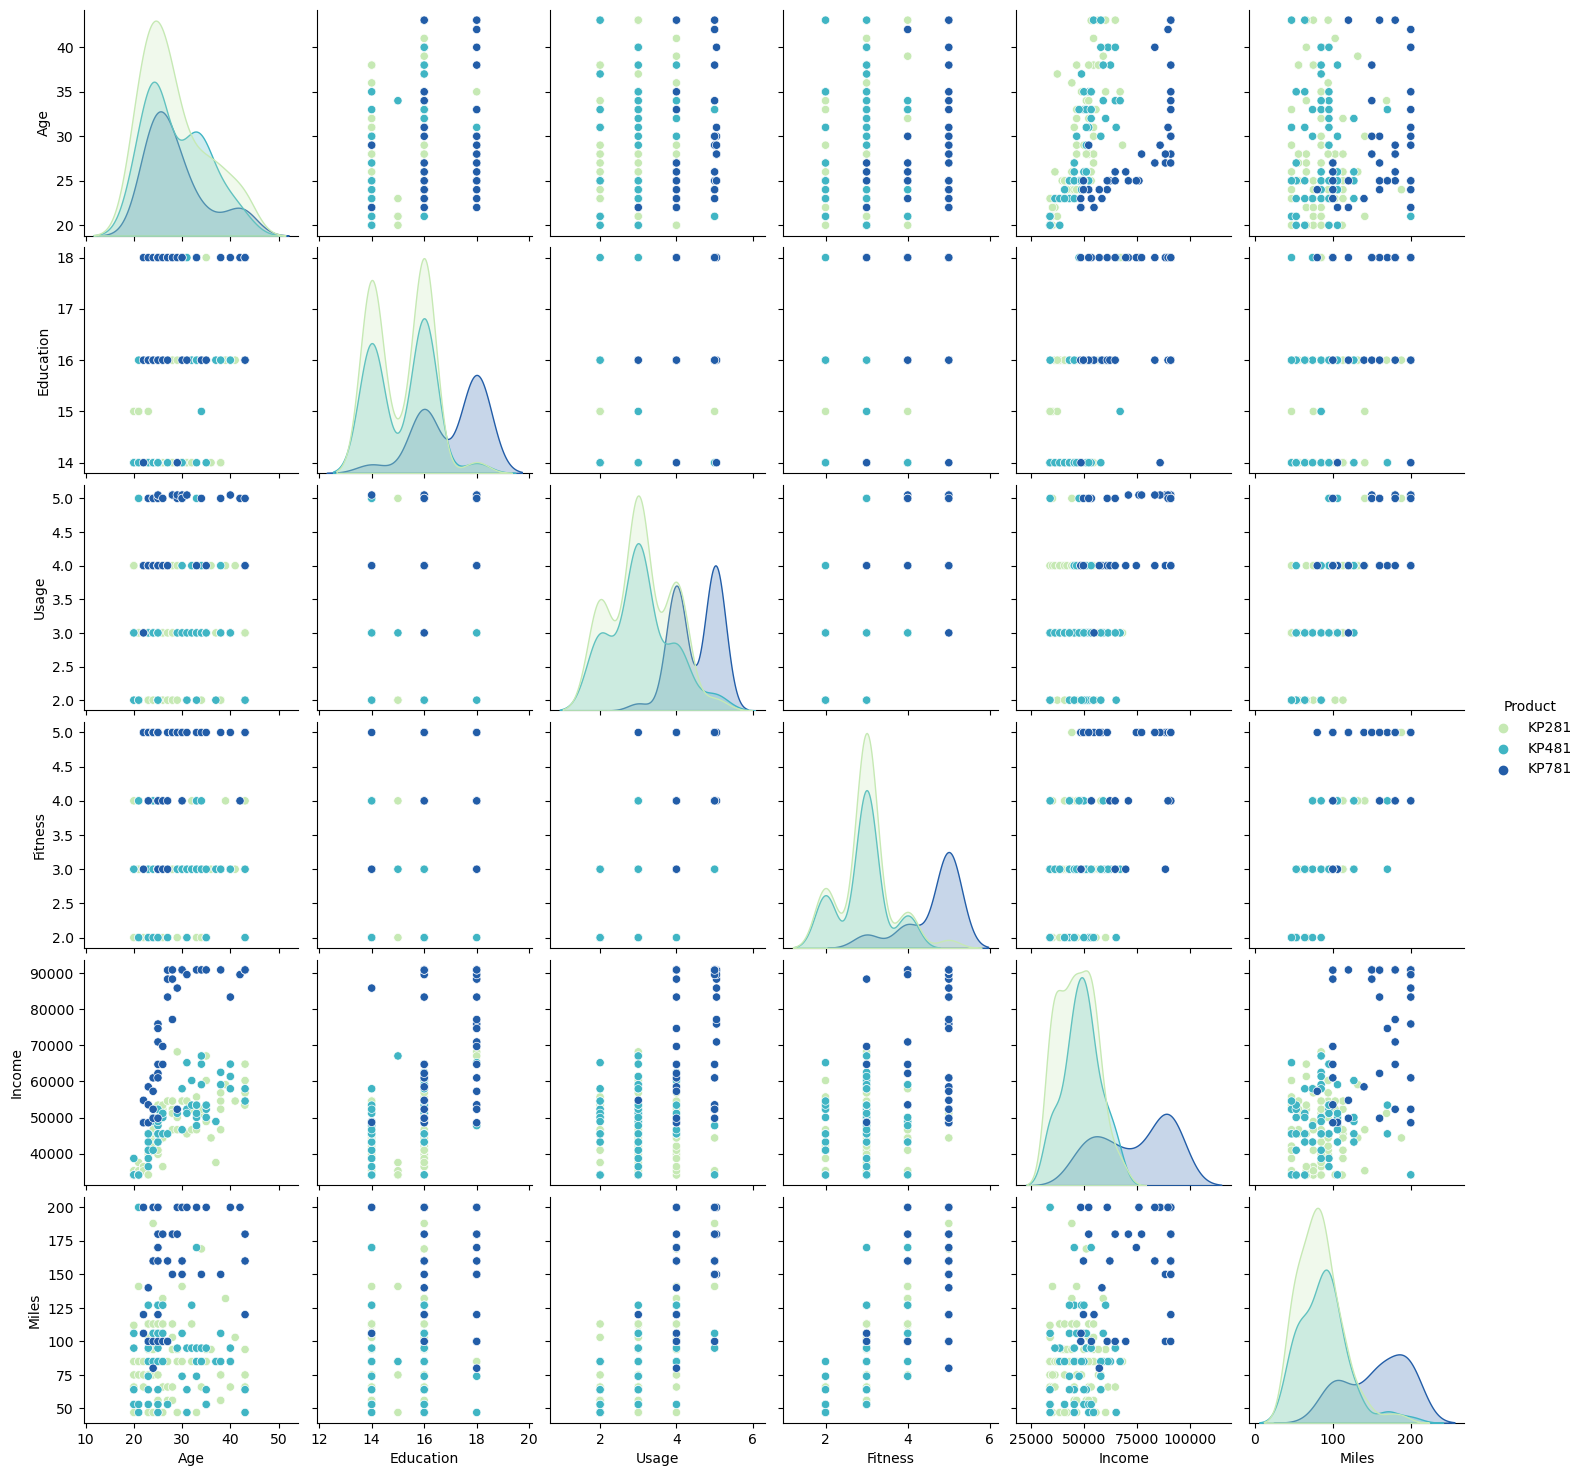

In [54]:
df_1 = copy.deepcopy(df)
sns.pairplot(df_1, hue ='Product', palette= 'YlGnBu')
plt.show()

Heat Map

In [55]:
df_1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47


In [56]:
df_1=df_1.drop(columns=['Product','Gender', 'MaritalStatus'])

In [57]:
df_1.head()

,Age,Education,Usage,Fitness,Income,Miles
0,20.0,14,3.0,4,34053.15,112
1,20.0,15,2.0,3,34053.15,75
2,20.0,14,4.0,3,34053.15,66
3,20.0,14,3.0,3,34053.15,85
4,20.0,14,4.0,2,35247.00,47


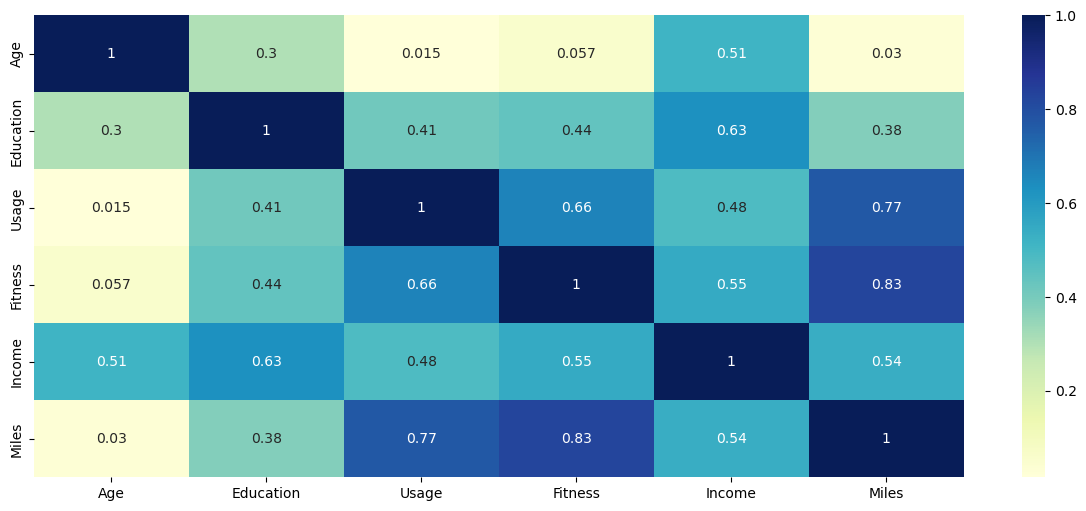

In [58]:
corr_mat = df_1.corr()

plt.figure(figsize=(15,6))

sns.heatmap(corr_mat,annot = True, cmap="YlGnBu")

plt.show()

From the pair plot we can see Age and Income are positively correlated and heatmap also suggests a strong correlation betwwen them

Eductaion and Income are highly correlated as its obvious. Eductation also has significatnt correlation between Fitness rating and Usage of the treadmill.

Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage.

# 6)Customer profiling and recommendation

In [59]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47


Profiling using Gender

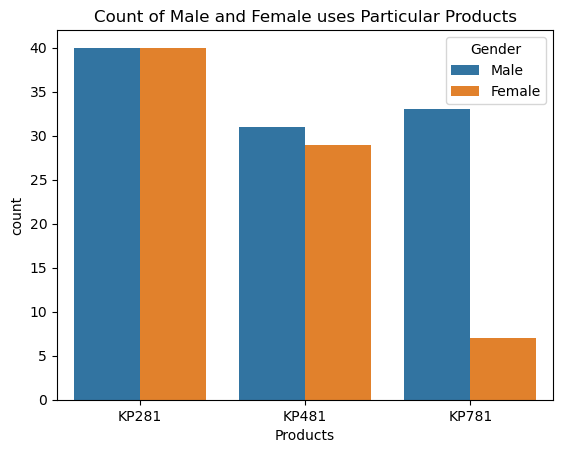

In [60]:
sns.countplot(x = "Product", data= df, hue = "Gender")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [61]:
pd.crosstab(df.Gender,df.Product,normalize='index', margins=True)

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


In [62]:
df_2=df
bin_range4 = [0,50,100,200,float('inf')]
bin_labels4 = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']

df_2['miles_group'] = pd.cut(df_2['Miles'],bins = bin_range4,labels = bin_labels4)
df_2.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,miles_group
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112,Active Lifestyle
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75,Moderate Activity
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66,Moderate Activity
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85,Moderate Activity
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47,Light Activity


In [63]:
pd.crosstab(index =df_2['Product'],columns = df_2['miles_group'],margins = True,normalize = True ).round(2)

miles_group,Light Activity,Moderate Activity,Active Lifestyle,All
Product,,,,
KP281,0.07,0.28,0.10,0.44
KP481,0.03,0.22,0.09,0.33
KP781,0.00,0.04,0.18,0.22
All,0.09,0.54,0.37,1.00


In [64]:
bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']

df_2['age_group'] = pd.cut(df_2['Age'],bins = bin_range1,labels = bin_labels1)

In [65]:
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']

df_2['income_group'] = pd.cut(df_2['Income'],bins = bin_range3,labels = bin_labels3)


In [66]:
pd.crosstab(index =df_2['Product'],columns = df_2['age_group'],margins = True,normalize = True ).round(2)

age_group,Young Adults,Adults,Middle Aged Adults,All
Product,,,,
KP281,0.19,0.18,0.08,0.44
KP481,0.16,0.13,0.04,0.33
KP781,0.09,0.09,0.03,0.22
All,0.44,0.41,0.16,1.00


In [67]:
pd.crosstab(index =df_2['Product'],columns = df_2['income_group'],margins = True,normalize = True ).round(2)

income_group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


Customer Profiling for Each Product

## KP281

Easily affordable entry level product, which is also the maximum selling product.

KP281 is the most popular product among the entry level customers.

This product is easily afforded by both Male and Female customers.

Average distance covered in this model is around 70 to 90 miles.

Product is used 3 to 4 times a week.

Most of the customer who have purchased the product have rated Average shape as the fitness rating.

Younger to Elder beginner level customers prefer this product.

Single female & Partnered male customers bought this product more than single male customers.

Income range between 39K to 53K have preferred this product.

## KP481

Customers Prefer this product mostly to cover more miles than fitness.

Average distance covered in this product is from 70 to 130 miles per week.

More Female customers prefer this product than males.

Probability of Female customer buying KP481 is significantly higher than male.

KP481 product is specifically recommended for Female customers who are intermediate user.

Three different age groups prefer this product - Teen, Adult and middle aged.

Average Income of the customer who buys KP481 is 49K.

Average Usage of this product is 3 days per week.

More Partnered customers prefer this product.

There are slightly more male buyers of the KP481.

The distance travelled on the KP481 treadmill is roughly between 75 - 100 Miles. It is also the 2nd most distance travelled model.

The buyers of KP481 in Single & Partnered, Male & Female are same.

The age range of KP481 treadmill customers is roughly between 24-34 years.



## KP781

Due to the High Price & being the advanced type, customer prefers less of this product.

Customers use this product mainly to cover more distance.

Customers who use this product have rated excelled shape as fitness rating.

Customer walk/run average 120 to 200 or more miles per week on his product.

Customers use 4 to 5 times a week at least.

Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.

Middle aged to higher age customers tend to use this model to cover more distance.

Average Income of KP781 buyers are over 75K per annum

Partnered Female bought KP781 treadmill compared to Partnered Male.



# 6.2)Recommendation

Marketing Campaigns for KP781

The KP784 model exhibits a significant sales disparity in terms of gender, with only 18% of total sales attributed to female customers. To enhance this metric, it is recommended to implement targeted strategies such as offering special promotions and trials exclusively designed for the female customers.
Affordable Pricing and Payment Plans

Given the target customer's age, education level, and income, it's important to offer the KP281 and KP481 Treadmill at an affordable price point. Additionally, consider providing flexible payment plans that allow customers to spread the cost over several months. This can make the treadmill more accessible to customers with varying budgets.
User-Friendly App Integration

Create a user-friendly app that syncs with the treadmill. This app could track users' weekly running mileage, provide real-time feedback on their progress, and offer personalized recommendations for workouts based on their fitness scale and goals.This can enhance the overall treadmill experience and keep users engaged.